In [102]:
import networkx as nx
import pandas as pd
import numpy as np

In [103]:
G = nx.Graph()

#### EDA

In [104]:
nodes = pd.read_csv('fb-pages-food.nodes', sep=',')
nodes.to_csv('nodes.csv')
nodes.head()

,id,name,new_id
0,402449106435352,Josh Marks,386
1,368969274888,Blue Ribbon Restaurants,473
2,765596333518863,Pat Neely,1
3,136870209668885,La Griglia,542
4,840078802741859,Jose Garces,189


In [105]:
print(f"Total Number of Nodes: {nodes.shape[0]}")

Total Number of Nodes: 620


In [106]:
edges = pd.read_csv('fb-pages-food.edges', sep=',',header=None)
edges.columns = ['Node_A', 'Node_B']
edges.to_csv('edges.csv')
edges.head()

,Node_A,Node_B
0,0,276
1,0,58
2,0,132
3,0,603
4,0,398


In [107]:
print(f"Total Number of Edges(mutual likes): {edges.shape[0]}")

Total Number of Edges(mutual likes): 2102


In [108]:
for i in nodes.iterrows():
    print(i[1])
    # print(i[1]['Node_A']," <-----> ",i[1]['Node_B'])
    break
    
    

id        402449106435352
name           Josh Marks
new_id                386
Name: 0, dtype: object


#### Adding nodes to the graph

In [109]:
G.number_of_nodes()

0

In [110]:
# Adding the Nodes along with their names
for i in nodes.iterrows():
    G.add_node(i[1]['new_id'], name=i[1]['name'])

In [111]:
G.number_of_nodes()

620

In [112]:
G.nodes[1]

{'name': 'Pat Neely'}

#### Reading the edges from the file and adding it to the graph "G".

In [113]:
G.number_of_edges()

0

In [114]:
for i in edges.iterrows():
    G.add_edge(i[1]['Node_A'], i[1]['Node_B'])

In [115]:
G.number_of_edges()

2102

#### Visualise the graph

In [116]:
import matplotlib.pyplot as plt

In [117]:
len(G.nodes)

620

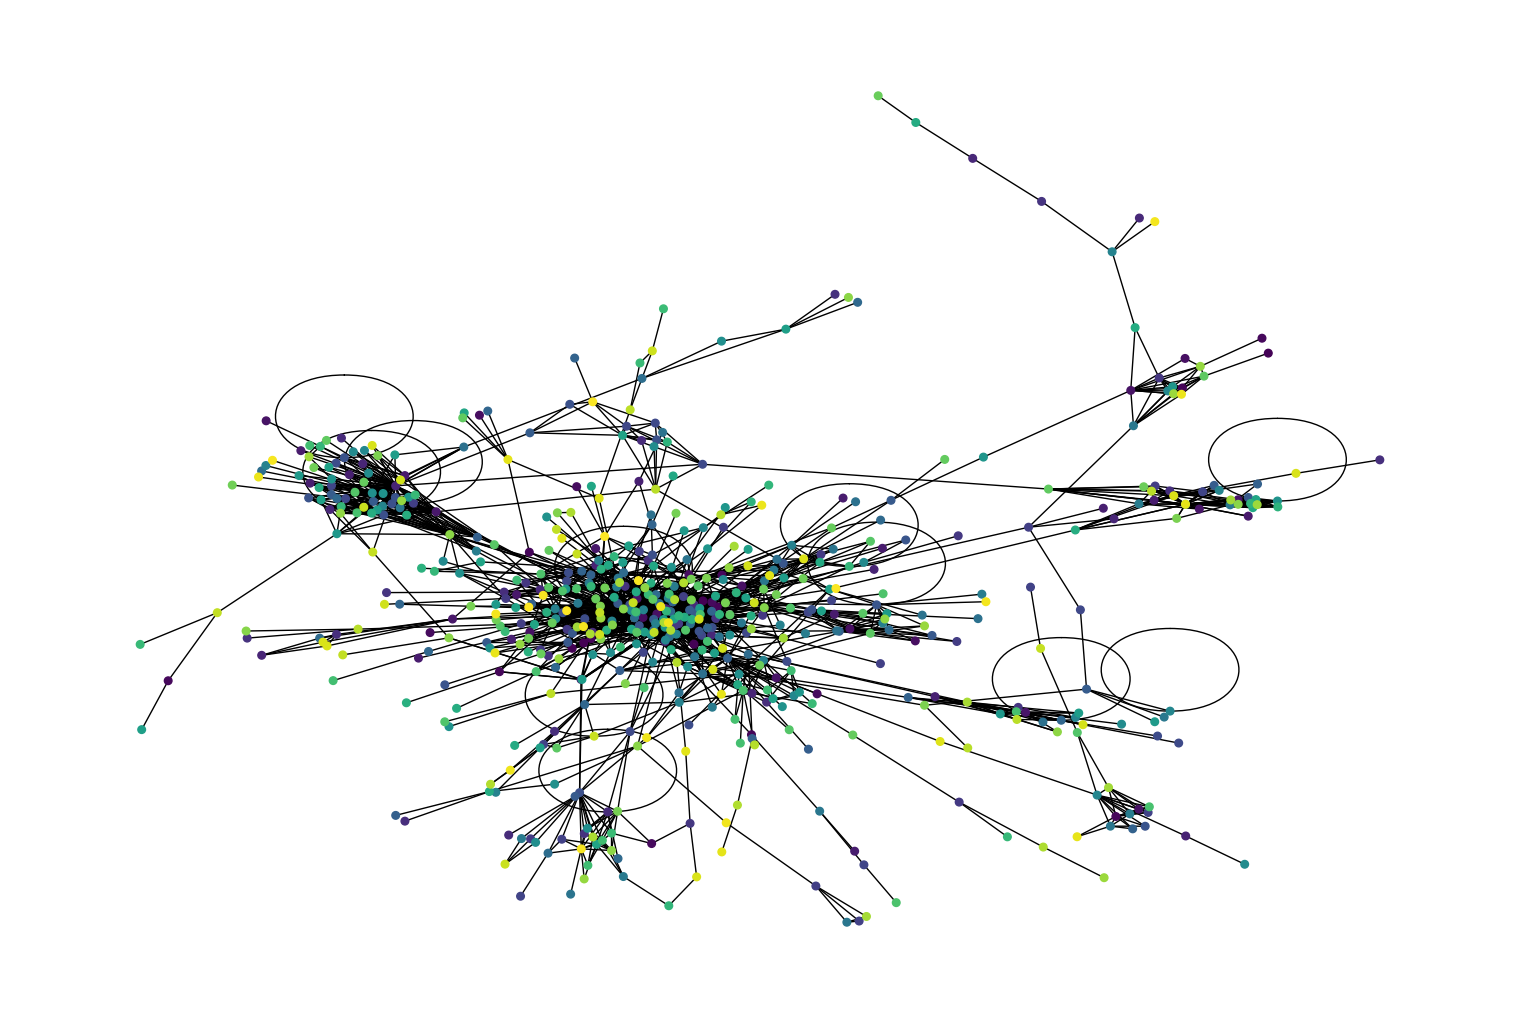

In [118]:



fig = plt.figure(figsize=(15, 10))
colors = np.linspace(0, 1, len(G.nodes))
nx.draw(G, 
        node_size=30,
        node_color=colors,
        edge_color='black')
# fig.set_facecolor('black')


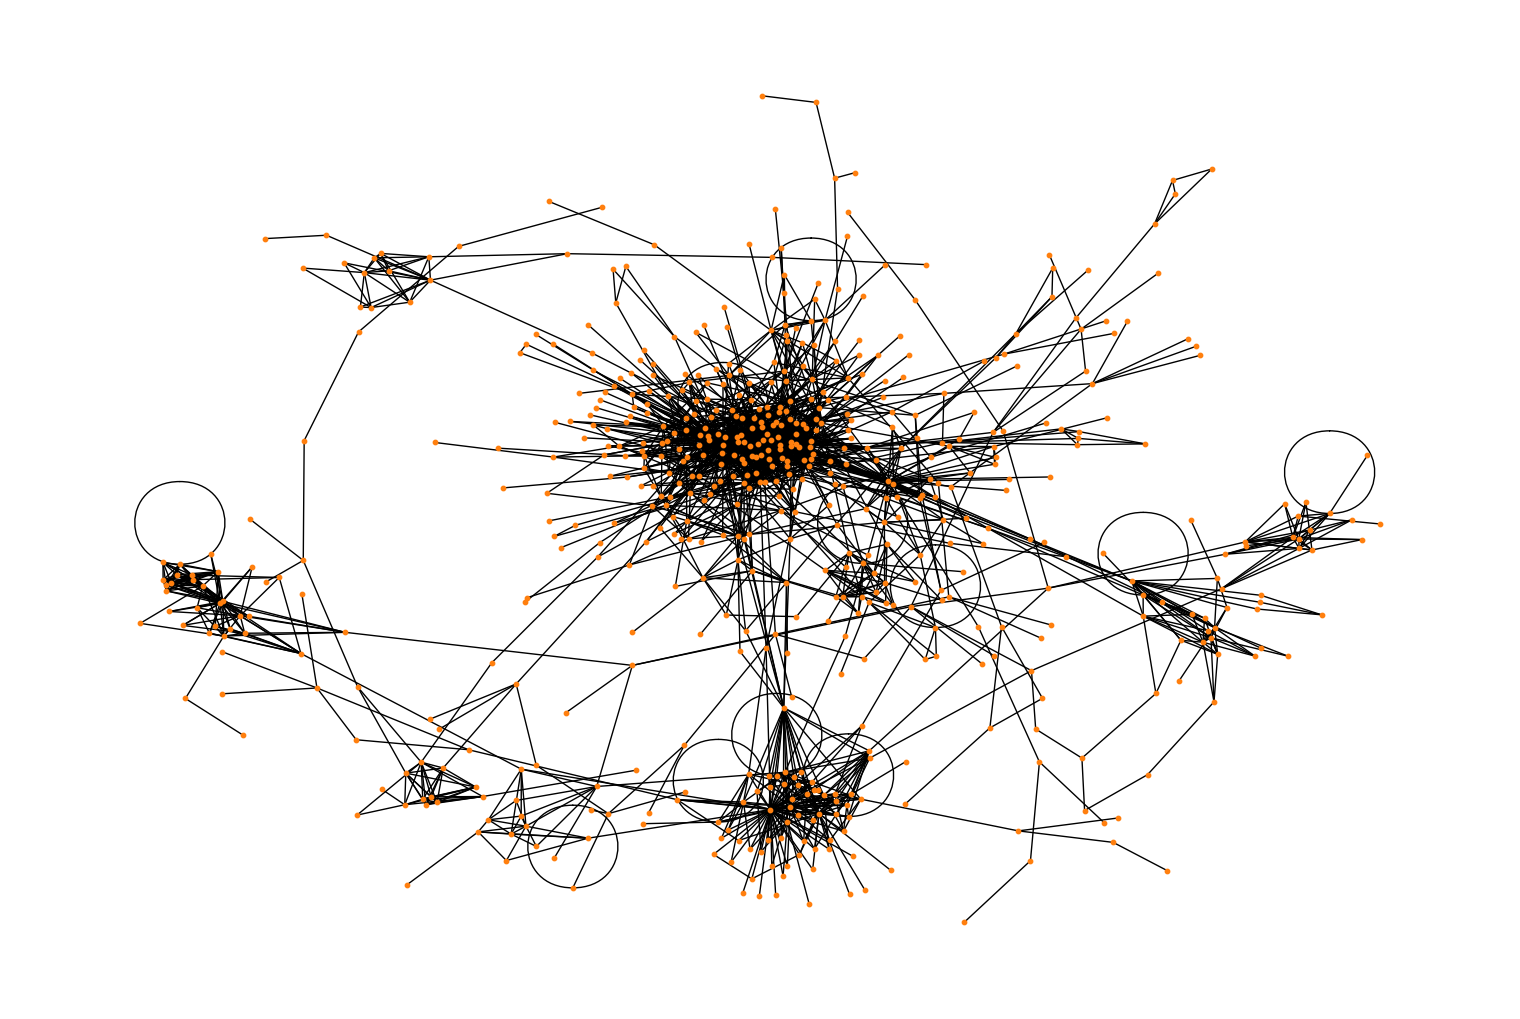

In [119]:
plt.figure(figsize=(15, 10))

k = 0.1
layout = nx.spring_layout(G,
                          k=k)
nx.draw(G,
        node_size=10,
        node_color='C1',
        pos=layout)

#### Degree

In [120]:
deg = dict(G.degree)

In [121]:
dict1 = sorted(deg.items(), key = lambda val:val[1], reverse=True)

In [122]:
s= 10

In [123]:
print("Average Number Of Likes: ",np.floor(np.mean([d for _, d in G.degree()])))

Average Number Of Likes:  6.0


In [124]:
print(f"Top {s} Mutually Liked Pages: ")
for i in range(s):
    print(f"{i+1}. {G.nodes[dict1[i][0]]['name']}  ---- {dict1[i][1]}")

Top 10 Mutually Liked Pages: 
1. Logan Junior Chef  ---- 134
2. McDonald's  ---- 59
3. David Chang  ---- 56
4. Eric Ripert  ---- 55
5. Scott Conant  ---- 51
6. Alex Guarnaschelli  ---- 47
7. Chef Daniel Boulud  ---- 47
8. Robin Miller  ---- 47
9. Chef Kent Graham  ---- 43
10. Tom Colicchio  ---- 37


In [125]:
dict2 = sorted(deg.items(), key = lambda val:val[1])

In [126]:
print(f"Least {s} Liked Pages: ")
for i in range(s):
    print(f"{i+1}. {G.nodes[dict2[i][0]]['name']}  ---- {dict2[i][1]}")

Least 10 Liked Pages: 
1. La Griglia  ---- 1
2. Peohe's  ---- 1
3. משה שגב / Moshe Segev  ---- 1
4. Angel Leon Gonzalez  ---- 1
5. Ben Ebbrell - Sorted Chef  ---- 1
6. Dick's Drive In Restaurant  ---- 1
7. Nutella Cafe Chicago  ---- 1
8. Veggie Grill  ---- 1
9. McDonald's  ---- 1
10. Éric Frechon  ---- 1


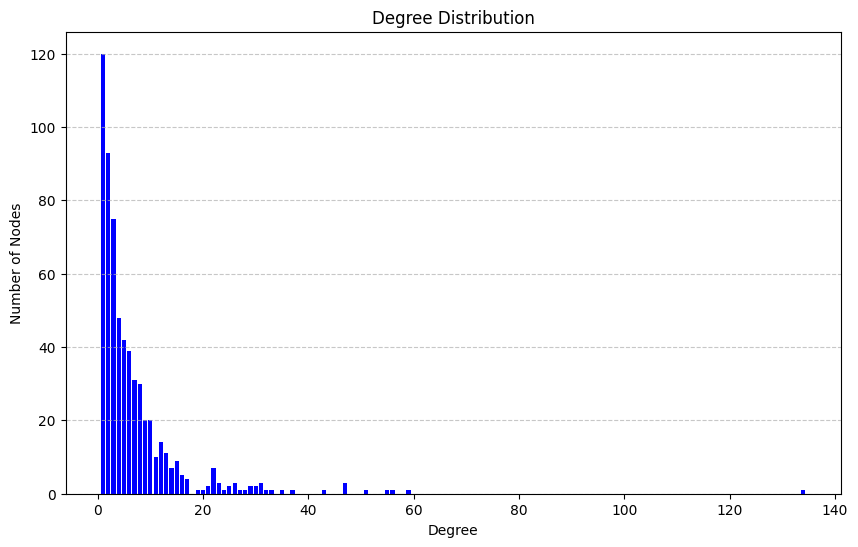

In [127]:
degrees = [degree for node, degree in G.degree()]

degree_counts = {}
for degree in degrees:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

sorted_degree_counts = dict(sorted(degree_counts.items()))

plt.figure(figsize=(10, 6))
plt.bar(sorted_degree_counts.keys(), sorted_degree_counts.values(), color='blue')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Real World Network Properties

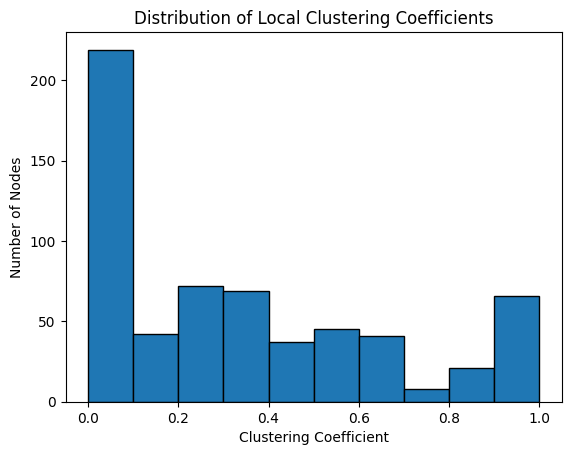

In [166]:
clustering_values = list(nx.clustering(G).values())

# Plot histogram of clustering coefficients
plt.hist(clustering_values, bins=10, edgecolor='black')
plt.xlabel("Clustering Coefficient")
plt.ylabel("Number of Nodes")
plt.title("Distribution of Local Clustering Coefficients")
plt.show()

In [128]:
print(f"Average Clustering Coefficient: {round(nx.average_clustering(G),4)}")

Average Clustering Coefficient: 0.3309


In [129]:
print(f"Average Path Length: {round(nx.average_shortest_path_length(G),4)}")

Average Path Length: 5.0887


In [130]:
print(f"Diameter of the Network: {nx.diameter(G)}")

Diameter of the Network: 17


#### Centrality

##### Degree Centrality

In [131]:
deg_centrality = nx.degree_centrality(G)

In [132]:
deg_cent = sorted(deg_centrality.items(), key = lambda v:v[1], reverse=True)

In [133]:
s = 10

In [134]:
print("Pages With High Mutual Likes: ")
for i in range(s):
    print(f"{i+1}. {G.nodes[deg_cent[i][0]]['name']}  ---- {round(deg_cent[i][1], 4)}")

Pages With High Mutual Likes: 
1. Logan Junior Chef  ---- 0.2165
2. McDonald's  ---- 0.0953
3. David Chang  ---- 0.0905
4. Eric Ripert  ---- 0.0889
5. Scott Conant  ---- 0.0824
6. Alex Guarnaschelli  ---- 0.0759
7. Chef Daniel Boulud  ---- 0.0759
8. Robin Miller  ---- 0.0759
9. Chef Kent Graham  ---- 0.0695
10. Tom Colicchio  ---- 0.0598


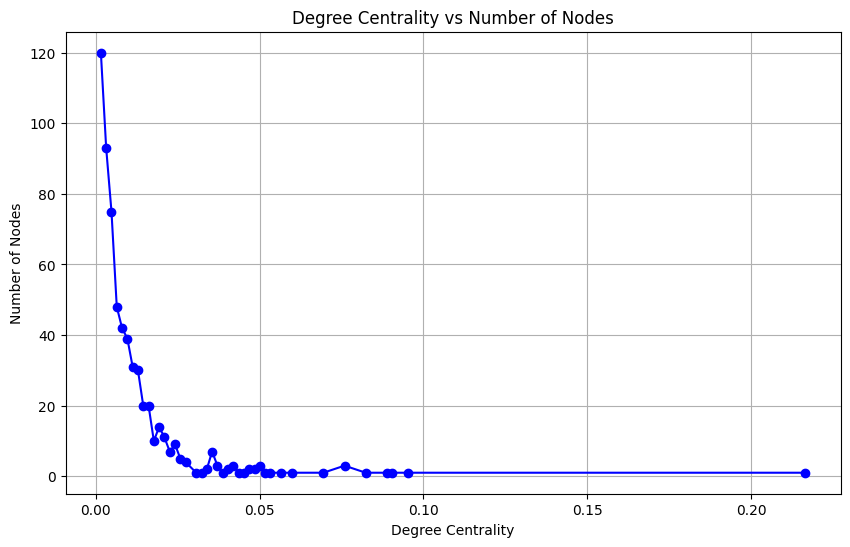

In [135]:

degree_counts = pd.Series(deg_centrality).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(degree_counts.index, degree_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Degree Centrality')
plt.ylabel('Number of Nodes')
plt.title('Degree Centrality vs Number of Nodes')
plt.grid(True)
plt.show()

##### Closeness Centrality

In [136]:
close_centrality = nx.closeness_centrality(G)

In [137]:
close_cent = sorted(close_centrality.items(), key = lambda v:v[1], reverse=True)

In [138]:
s  = 10
for i in range(s):
    print(f"{i+1}. {G.nodes[close_cent[i][0]]['name']}  ---- {round(close_cent[i][1], 4)}")

1. Logan Junior Chef  ---- 0.3314
2. Robin Miller  ---- 0.3028
3. Chef Daniel Boulud  ---- 0.2982
4. Scott Conant  ---- 0.298
5. Alex Guarnaschelli  ---- 0.2948
6. Marcus Samuelsson  ---- 0.2924
7. René Redzepi  ---- 0.2912
8. David Chang  ---- 0.2909
9. Eric Ripert  ---- 0.2893
10. Tom Aikens  ---- 0.2884


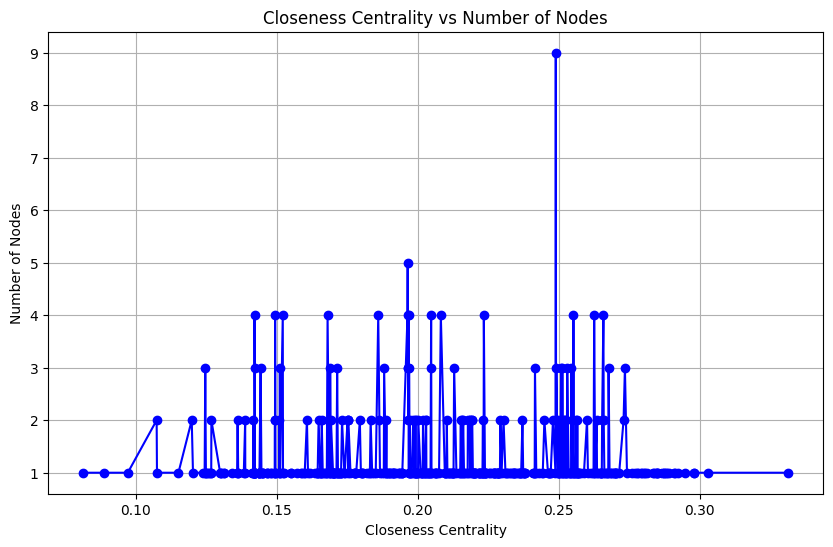

In [139]:

close_counts = pd.Series(close_centrality).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(close_counts.index, close_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Closeness Centrality')
plt.ylabel('Number of Nodes')
plt.title('Closeness Centrality vs Number of Nodes')
plt.grid(True)
plt.show()

##### Betweeness Centrality

In [140]:
bet_centrality = nx.betweenness_centrality(G)

In [141]:
bet_cent = sorted(bet_centrality.items(), key = lambda v:v[1], reverse=True)


In [142]:
s=10
for i in range(s):
    print(f"{i+1}. {G.nodes[bet_cent[i][0]]['name']}  ---- {round(bet_cent[i][1], 4)}")

1. Logan Junior Chef  ---- 0.3499
2. McDonald's  ---- 0.162
3. McDonald's  ---- 0.1446
4. Subway  ---- 0.0933
5. Chef Robert Irvine  ---- 0.0914
6. foodpanda - 空腹熊貓  ---- 0.0791
7. Dani García  ---- 0.0723
8. 達美樂披薩  ---- 0.0584
9. Marcus Samuelsson  ---- 0.0572
10. Chef Lorena Garcia  ---- 0.057


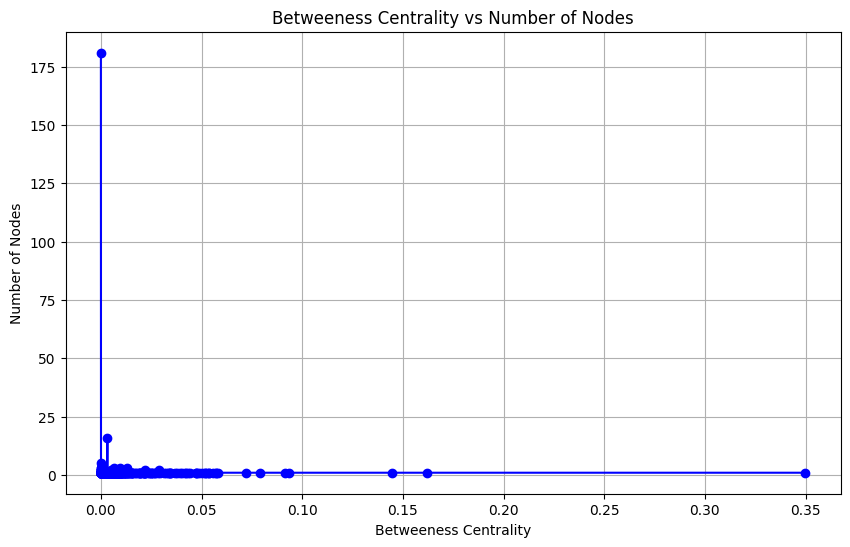

In [143]:

bet_counts = pd.Series(bet_centrality).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(bet_counts.index, bet_counts.values, marker='o', linestyle='-', color='b')
plt.xlabel('Betweeness Centrality')
plt.ylabel('Number of Nodes')
plt.title('Betweeness Centrality vs Number of Nodes')
plt.grid(True)
plt.show()

#### Connected Components

In [162]:
num_components = nx.number_connected_components(G)
print("Number of connected components:", num_components)


Number of connected components: 1


#### Bridges

In [144]:
l = len(list(nx.local_bridges(G)))

In [ ]:
import math


li = list(nx.local_bridges(G))
ct = 0
for i in range(l):69
    if li[i][2] == math.inf:
        ct = ct+1


In [146]:

print(f"Total Number of Bridges: {ct}")

Total Number of Bridges: 134


In [147]:
print(f"Total Number of Local Bridges: {l}")

Total Number of Local Bridges: 338


In [148]:
print('Local Bridges:')
list(nx.local_bridges(G))

Local Bridges:


[(386, 298, 3),
 (542, 223, inf),
 (248, 381, inf),
 (248, 499, 4),
 (537, 58, inf),
 (537, 96, inf),
 (293, 7, 3),
 (293, 49, 4),
 (171, 50, 3),
 (171, 82, 3),
 (171, 406, inf),
 (171, 202, 3),
 (171, 459, 3),
 (258, 10, 6),
 (258, 403, 3),
 (534, 214, inf),
 (500, 47, inf),
 (500, 513, inf),
 (194, 619, 3),
 (194, 226, 6),
 (194, 398, 3),
 (34, 373, 3),
 (34, 208, 3),
 (562, 50, inf),
 (511, 498, inf),
 (201, 114, inf),
 (188, 49, inf),
 (440, 250, 3),
 (440, 418, 4),
 (240, 72, 4),
 (235, 354, 3),
 (235, 578, 3),
 (82, 584, 3),
 (82, 409, inf),
 (35, 536, 3),
 (35, 618, 6),
 (154, 129, 7),
 (148, 57, inf),
 (230, 26, inf),
 (164, 176, 3),
 (164, 337, 6),
 (396, 229, inf),
 (284, 374, 3),
 (284, 545, 3),
 (160, 20, 4),
 (160, 383, 4),
 (573, 518, inf),
 (61, 244, inf),
 (25, 363, inf),
 (211, 96, inf),
 (434, 8, 6),
 (434, 41, 3),
 (434, 88, 3),
 (218, 521, inf),
 (56, 359, 3),
 (138, 80, inf),
 (138, 114, 4),
 (138, 418, 4),
 (591, 605, 3),
 (202, 183, 3),
 (202, 186, 3),
 (202, 426

#### Pagerank

In [149]:
ranks = nx.pagerank(G)

In [150]:
type(G.nodes[0])

dict

In [151]:
type(ranks)

dict

In [152]:
s_rank = sorted(ranks.items(), key=lambda x: x[1], reverse=True)
s = 10
top_influ = s_rank[:s]

In [153]:
type(top_influ[0])

tuple

In [154]:
print(f"Top {s} influencers: ")
for i in range(s):
    print(f"{i+1}. {G.nodes[top_influ[i][0]]['name']}")

Top 10 influencers: 
1. Logan Junior Chef
2. McDonald's
3. David Chang
4. Eric Ripert
5. Scott Conant
6. Chef Daniel Boulud
7. Robin Miller
8. Dani García
9. McDonald's
10. Alex Guarnaschelli


#### All Pair Shortest Path


In [155]:
shortest_path_lengths = list(nx.all_pairs_shortest_path_length(G))

In [156]:
def get_shortest_path_length(node_from, node_to, shortest_path_lengths):
    for node, lengths in shortest_path_lengths:
        if node == node_from:
            return lengths.get(node_to, float('inf'))
    return float('inf') 


In [157]:
# n1 = int(input("Enter the starting node: "))
# n2 = int(input("Enter the target node: "))

n1 = 7
n2 = 17
length = get_shortest_path_length(n1, n2, shortest_path_lengths)

if length != float('inf'):
    print(f"The shortest path length from node {n1} to node {n2} is: {length}")
else:
    print("Node {n2} is not reachable from node {n1}.")

The shortest path length from node 7 to node 17 is: 4


#### Link Prediction

In [158]:

no_edge_pairs = set()

for node, lengths in shortest_path_lengths:
    for target_node, _ in lengths.items():
        if length > 1:  
            pair = tuple(sorted((node, target_node)))
            no_edge_pairs.add((pair[0], pair[1]))

len(no_edge_pairs)

192510

##### Common Neighbourhood

In [159]:
common_neighbors_counts = {}

for u, v in no_edge_pairs:
    common_neighbors_counts[(u, v)] = len(list(nx.common_neighbors(G, u, v)))

sorted_common_neighbors = sorted(common_neighbors_counts.items(), key=lambda item: item[1], reverse=True)


print("Top 10 pairs which has high chance of link formation based on COMMON NEIGHBOURHOOD: \n")

df = pd.DataFrame(sorted_common_neighbors)
df.columns = ["Node pair", "Common Neighborhood Score"]
print(df.head(10))


# ct = 0
# print(f"Node 1\t Node 2\t Common Neighbourhood Score")
# for (u, v), count in sorted_common_neighbors:
#     print(f" {u} \t  {v} \t  \t{count}")
#     ct+=1
#     if ct == 10: break

Top 10 pairs which has high chance of link formation based on COMMON NEIGHBOURHOOD: 

    Node pair  Common Neighborhood Score
0  (265, 265)                        132
1  (518, 518)                         59
2    (67, 67)                         56
3  (340, 340)                         55
4    (90, 90)                         51
5  (611, 611)                         47
6    (70, 70)                         47
7    (56, 56)                         47
8  (265, 611)                         46
9   (89, 265)                         43


##### Resource Allocation Index

In [160]:
resource_allocation_scores = {}

for u, v, p in nx.resource_allocation_index(G, no_edge_pairs):
    resource_allocation_scores[(u, v)] = p

# Sort the pairs based on the resource allocation score in descending order
sorted_resource_allocation = sorted(resource_allocation_scores.items(), key=lambda item: item[1], reverse=True)

# Prepare DataFrame for the top results
df = pd.DataFrame(sorted_resource_allocation, columns=["Node pair", "Resource Allocation Score"])

# Display the top 10 pairs
print("Top 10 pairs with high chance of link formation based on Resource Allocation Index: \n")
print(df.head(10))

Top 10 pairs with high chance of link formation based on Resource Allocation Index: 

    Node pair  Resource Allocation Score
0  (265, 265)                  29.617938
1  (518, 518)                  16.822685
2  (524, 524)                   8.561103
3  (498, 498)                   7.302559
4    (70, 70)                   5.033079
5    (67, 67)                   5.016259
6  (389, 389)                   4.752641
7    (49, 49)                   4.583333
8  (340, 340)                   4.554408
9  (357, 357)                   4.539267


##### Jaccard Similarity

In [161]:
jaccard_scores = {}

for u, v, p in nx.jaccard_coefficient(G, no_edge_pairs):
    jaccard_scores[(u, v)] = p

# Sort the pairs based on the Jaccard score in descending order
sorted_jaccard_scores = sorted(jaccard_scores.items(), key=lambda item: item[1], reverse=True)

# Prepare DataFrame for the top results
df = pd.DataFrame(sorted_jaccard_scores, columns=["Node pair", "Jaccard Similarity Score"])

# Display the top 10 pairs
print("Top 10 pairs with high chance of link formation based on Jaccard Similarity: \n")
print(df.head(10))

Top 10 pairs with high chance of link formation based on Jaccard Similarity: 

    Node pair  Jaccard Similarity Score
0  (220, 220)                       1.0
1    (83, 83)                       1.0
2  (554, 554)                       1.0
3  (417, 417)                       1.0
4  (298, 298)                       1.0
5  (161, 161)                       1.0
6   (18, 233)                       1.0
7  (246, 246)                       1.0
8  (109, 109)                       1.0
9    (39, 39)                       1.0
